In [ ]:
# v3 start 1D
# read from normed_data/

In [1]:
%whos

Interactive namespace is empty.


In [2]:
pwd

'/Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/synthetic_TCGA_data_gen/b_model'

In [9]:
ls ../a_data_structure/normed_data/

test_norm.tsv   train_norm.tsv


In [ ]:
# ignore new data folder

In [4]:
# import glob
import tensorflow as tf
import numpy as np
import pandas as pd

2022-10-10 12:42:42.875653: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
%whos

Variable   Type      Data/Info
------------------------------
glob       module    <module 'glob' from '/Use<...>3/lib/python3.9/glob.py'>
np         module    <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd         module    <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
tf         module    <module 'tensorflow' from<...>/tensorflow/__init__.py'>


In [ ]:
# go back for labels, to UMAP

In [12]:
train_norm = pd.read_csv('../a_data_structure/normed_data/train_norm.tsv',
                  sep = '\t',
                   index_col = 0)

In [13]:
test_norm = pd.read_csv('../a_data_structure/normed_data/test_norm.tsv',
                  sep = '\t',
                   index_col = 0)

In [15]:
train_norm.head(1)

,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,N:GEXP::?:317712:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
0,0.0,0.0,0.060688,0.190093,0.120877,0.0,0.064528,0.0,0.0,0.0,...,0.167245,0.226274,0.219092,0.014614,0.376986,0.140468,0.135513,0.186737,0.009614,0.040715


In [17]:
type(train_norm.iloc[0,0])

numpy.float64

In [20]:
from keras.layers import Conv2D

In [19]:
from keras.layers import Conv1D

In [21]:
from keras.layers import Dense

In [23]:
Dense.__doc__

'Just your regular densely-connected NN layer.\n\n    `Dense` implements the operation:\n    `output = activation(dot(input, kernel) + bias)`\n    where `activation` is the element-wise activation function\n    passed as the `activation` argument, `kernel` is a weights matrix\n    created by the layer, and `bias` is a bias vector created by the layer\n    (only applicable if `use_bias` is `True`). These are all attributes of\n    `Dense`.\n\n    Note: If the input to the layer has a rank greater than 2, then `Dense`\n    computes the dot product between the `inputs` and the `kernel` along the\n    last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).\n    For example, if input has dimensions `(batch_size, d0, d1)`, then we create\n    a `kernel` with shape `(d1, units)`, and the `kernel` operates along axis 2\n    of the `input`, on every sub-tensor of shape `(1, 1, d1)` (there are\n    `batch_size * d0` such sub-tensors).  The output in this case will have\n    

In [ ]:
10 samples, 128 columns

In [24]:
Conv1D.__doc__

'1D convolution layer (e.g. temporal convolution).\n\n    This layer creates a convolution kernel that is convolved\n    with the layer input over a single spatial (or temporal) dimension\n    to produce a tensor of outputs.\n    If `use_bias` is True, a bias vector is created and added to the outputs.\n    Finally, if `activation` is not `None`,\n    it is applied to the outputs as well.\n\n    When using this layer as the first layer in a model,\n    provide an `input_shape` argument\n    (tuple of integers or `None`, e.g.\n    `(10, 128)` for sequences of 10 vectors of 128-dimensional vectors,\n    or `(None, 128)` for variable-length sequences of 128-dimensional vectors.\n\n    Examples:\n\n    >>> # The inputs are 128-length vectors with 10 timesteps, and the\n    >>> # batch size is 4.\n    >>> input_shape = (4, 10, 128)\n    >>> x = tf.random.normal(input_shape)\n    >>> y = tf.keras.layers.Conv1D(\n    ... 32, 3, activation=\'relu\',input_shape=input_shape[1:])(x)\n    >>> prin

In [27]:
from keras.layers import Input

In [28]:
encoder_input = Input(shape=train_norm.shape)

In [29]:
encoder_input # inferred and inserted batch size

<KerasTensor: shape=(None, 299, 20531) dtype=float32 (created by layer 'input_1')>

In [ ]:
# filters go up through encoder layers, outward in detail
# e.g. 8 first, then 16 on next layer

# 

In [31]:
encoder_conv = Conv1D(filters=8, kernel_size=3)

In [32]:
encoder_conv = Conv1D(filters=8, kernel_size=3)(encoder_input)

2022-10-10 13:12:51.060712: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
encoder_conv = Conv1D(filters=8,
                      kernel_size=3,
                      activation='relu',
                      padding='same')(encoder_input) # done

In [43]:
# Float.64 on 1Dconv run
# from https://becominghuman.ai/using-variational-autoencoder-vae-to-generate-new-images-14328877e88d

latent_dim = 100

# import numpy as np # clean up imports
# import matplotlib.pyplot as plt

import tensorflow as tf; tf.compat.v1.disable_eager_execution()

from keras import backend as K
from keras.layers import (Input, # want float.64 to go into this layer, two input layers (enc and dec)
                          Conv1D,
                          
                          Dense,
                          Conv2D,

                          Conv2DTranspose,
                          Conv1DTranspose,
                          Flatten, # might not need to go back to Dense
                          
                          Lambda,
                          Reshape)
from keras.models import Model

from keras.losses import binary_crossentropy

print('libraries done')

# np.random.seed(25)

tf.executing_eagerly()

# Reparameterization, sample from given distribution
def compute_latent(x):
    batch = K.shape(mu)[0] # mu and sigma defined after encoder is built
    dim = K.int_shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim))
    return mu + K.exp(sigma/2)*eps

# Difference between data and reconstructed 
def kl_reconstruction_loss(true, pred):                                                  
    reconstruction_loss = binary_crossentropy(K.flatten(true), K.flatten(pred))
    kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma) # mu and sigma input to loss function
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    return K.mean(reconstruction_loss + kl_loss)

# img_height   = train_norm.shape[1] # shape hieght is at postition one
# img_width    = train_norm.shape[2]
# num_channels = train_norm.shape[3]

# input_shape =  (img_height, img_width, num_channels) # shape has three dimensions

# flatten inputs, diff between 1D and dense? - have to have same input shapes

# encoder_input = Input(shape=input_shape)
encoder_input = Input(shape=train_norm.shape)

# encoder_conv = Conv1D(filters=8, kernel_size=3, strides=2, 
#                 padding='same', activation='relu')(encoder_input)
encoder_conv = Conv1D(filters=8,
                      kernel_size=3,
                      activation='relu',
                      padding='same')(encoder_input)

encoder_conv = Conv1D(filters=16,
                      kernel_size=3,
                      padding='same',
                      activation='relu')(encoder_conv)

encoder = Flatten()(encoder_conv)

# mu = Dense(latent_dim)(encoder)
# sigma = Dense(latent_dim)(encoder)

mu = Dense(latent_dim)(encoder)     # mu defined
sigma = Dense(latent_dim)(encoder)  # sigma defined
                                                                # 2 args to compute lambda
latent_space = Lambda(compute_latent, output_shape=(latent_dim,))([mu, sigma])
                    
conv_shape = K.int_shape(encoder_conv)

# Decoder start
decoder_input = Input(shape=(latent_dim,)) # input layer again (actually comma none, inferred at run time)

# decoder = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3], activation='relu')(decoder_input)
decoder = Dense(conv_shape[1]*conv_shape[2], activation='relu')(decoder_input)
decoder = Reshape((conv_shape[1], conv_shape[2]))(decoder)

decoder_conv = Conv1DTranspose(filters=16,
                      kernel_size=3,
                      padding='same',
                      activation='relu')(decoder)

decoder_conv = Conv1DTranspose(filters=8,
                      kernel_size=3,
                      activation='relu',
                      padding='same')(decoder_conv)

# decoder = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(decoder)

# decoder_conv = Conv2DTranspose(filters=16, kernel_size=3, strides=2, 
#                            padding='same', activation='relu')(decoder)
# decoder_conv = Conv2DTranspose(filters=8, kernel_size=3, strides=2, 
#                            padding='same', activation='relu')(decoder)

# decoder_conv =  Conv2DTranspose(filters=num_channels, kernel_size=3, 
#                           padding='same', activation='sigmoid')(decoder_conv)

encoder = Model(encoder_input, latent_space)
decoder = Model(decoder_input, decoder_conv)
vae = Model(encoder_input, decoder(encoder(encoder_input)))
vae.compile(optimizer='adam', loss=kl_reconstruction_loss)  # blank model set for (pre)training
print('model built')

libraries done
model built


In [44]:
encoder.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 299, 20531)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1d_15 (Conv1D)             (None, 299, 8)       492752      ['input_11[0][0]']               
                                                                                                  
 conv1d_16 (Conv1D)             (None, 299, 16)      400         ['conv1d_15[0][0]']              
                                                                                                  
 flatten_5 (Flatten)            (None, 4784)         0           ['conv1d_16[0][0]']        

In [45]:
decoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_16 (Dense)            (None, 4784)              483184    
                                                                 
 reshape_1 (Reshape)         (None, 299, 16)           0         
                                                                 
 conv1d_transpose_4 (Conv1DT  (None, 299, 16)          784       
 ranspose)                                                       
                                                                 
 conv1d_transpose_5 (Conv1DT  (None, 299, 8)           392       
 ranspose)                                                       
                                                                 
Total params: 484,360
Trainable params: 484,360
Non-trainab

In [41]:
decoder.shape

TensorShape([None, 4784])

In [14]:
tf.utils.plot_model(encoder) # fix, put to sample code

AttributeError: module 'tensorflow' has no attribute 'utils'

In [22]:
epochs = 10

In [17]:
cohort = 'BLCA, float.64, MinMax'

In [18]:
version = 'b_model_02.ipynb'

In [19]:
date = '2022-10-09'

In [12]:
ls

README.txt              b_model_01.ipynb
b_model_01-Copy1.ipynb  loss_curves_ignored/


In [23]:
batch_size = 32

Train on 299 samples, validate on 100 samples
Epoch 1/10


2022-10-09 11:09:00.562748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-09 11:09:00.604387: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


299/299 [==============================] - ETA: 0s - loss: 11953.1675

/Users/karlberb/Desktop/RNB00978/sample_count/tf_venv_a/lib/python3.9/site-packages/keras/engine/training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


299/299 [==============================] - 4s 12ms/sample - loss: 11953.1675 - val_loss: 10103.5921
Epoch 2/10
299/299 [==============================] - 2s 8ms/sample - loss: 8208.1898 - val_loss: 9315.5261
Epoch 3/10
299/299 [==============================] - 3s 8ms/sample - loss: 7696.3746 - val_loss: 9523.4234
Epoch 4/10
299/299 [==============================] - 2s 8ms/sample - loss: 7548.8245 - val_loss: 9269.2233
Epoch 5/10
299/299 [==============================] - 3s 10ms/sample - loss: 7463.1568 - val_loss: 9069.7998
Epoch 6/10
299/299 [==============================] - 3s 11ms/sample - loss: 7423.4598 - val_loss: 8984.8168
Epoch 7/10
299/299 [==============================] - 4s 12ms/sample - loss: 7380.0486 - val_loss: 9170.9911
Epoch 8/10
299/299 [==============================] - 3s 9ms/sample - loss: 7349.0894 - val_loss: 9103.6628
Epoch 9/10
299/299 [==============================] - 3s 9ms/sample - loss: 7315.5733 - val_loss: 8930.4845
Epoch 10/10
299/299 [============

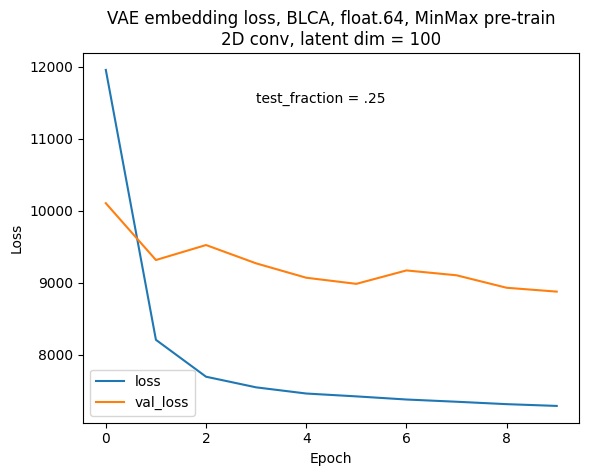

In [24]:

history = vae.fit(x=X_train_new, y=X_train_new, epochs=epochs,
                  batch_size=batch_size, # why is this set to 32?
                  validation_data=(X_test_new, X_test_new))

plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.title('VAE embedding loss, '+cohort+' pre-train\n'+

          # file.index.name+', burn-in, n = 495'+

          '2D conv, latent dim = '+str(latent_dim))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate('test_fraction = .25',
            xy=(.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            # fontsize=20
            )

plt.legend(loc="lower left")
# plt.savefig('dir_n/cohort_n'+str(epochs)+'_epochs_2022-08-date_version.png')
plt.savefig('loss_curves_ignored/'+cohort+'_pretrain_'+

            # file.index.name+
            # '_brn_n_'+str(len(brca_burn_in))+'_'+

            str(epochs)+'_epochs_'+
            str(latent_dim)+'_latent_dim_'+
            date+'_'+version+'_r0.png')

In [ ]:
# Encode and decode train, val independently

In [43]:
tst_ltnt = encoder.predict(X_test_new)

/Users/karlberb/Desktop/RNB00978/sample_count/tf_venv_a/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [44]:
trn_ltnt = encoder.predict(X_train_new)

In [45]:
tst_dec = decoder.predict(tst_ltnt)

In [46]:
trn_dec = decoder.predict(trn_ltnt)

In [48]:
tst_dec.shape

(100, 144, 144, 1)

In [51]:
tst_dec.flatten(100,20532)

TypeError: flatten() takes from 0 to 1 positional arguments but 2 were given

In [53]:
tst_dec[0].reshape(20736)

array([0.16375491, 0.1794188 , 0.20635223, ..., 0.01227512, 0.0133549 ,
       0.01111129], dtype=float32)

In [ ]:
# train and test are dataframes split off from the original read-in
# file, want to put the decoded arrays to dataframe as to send to UMAP

In [ ]:
# re-running

In [54]:
stor = 
for i in tst_dec:
    break

In [56]:
i.shape

(144, 144, 1)

In [57]:
i.reshape(20736).shape

(20736,)

In [ ]:
# Attempt to flatten input as alt to re-read input
# data structure is reading from gexp original file set

In [35]:
tst_flt = X_test_new.reshape(100, 20736).shape

In [36]:
trn_flt = X_train_new.reshape(299, 20736).shape

In [37]:
tst_frame = pd.DataFrame(tst_flt)

In [38]:
trn_frame = pd.DataFrame(trn_flt)

In [40]:
full_data = pd.concat([tst_frame , trn_frame])

In [41]:
full_data

,0
0,100
1,20736
0,299
1,20736


In [ ]:
# End flatten fail, go to data structure to get the square wrap function, then reverse it
# There is a reshape function in the main